# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


In [ ]:
# Look at json structure
url = 'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key
city='Chicago'
city_url = url+'&q='+city
city_weather = requests.get(city_url).json()
city_weather

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+'&q='+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))  

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date =city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,remire-montjoly,4.9167,-52.2667,29.02,74,75,1.54,GF,1697492878
1,muhos,64.8080,25.9931,2.88,86,100,4.07,FI,1697492878
2,grytviken,-54.2811,-36.5092,-0.61,84,13,4.27,GS,1697492878
3,vilyuchinsk,52.9306,158.4028,8.15,92,100,10.27,RU,1697492878
4,polyarnyy,69.1989,33.4478,3.30,78,100,13.08,RU,1697492879


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,29.02,74,75,1.54,GF,1697492878
1,muhos,64.8080,25.9931,2.88,86,100,4.07,FI,1697492878
2,grytviken,-54.2811,-36.5092,-0.61,84,13,4.27,GS,1697492878
3,vilyuchinsk,52.9306,158.4028,8.15,92,100,10.27,RU,1697492878
4,polyarnyy,69.1989,33.4478,3.30,78,100,13.08,RU,1697492879


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

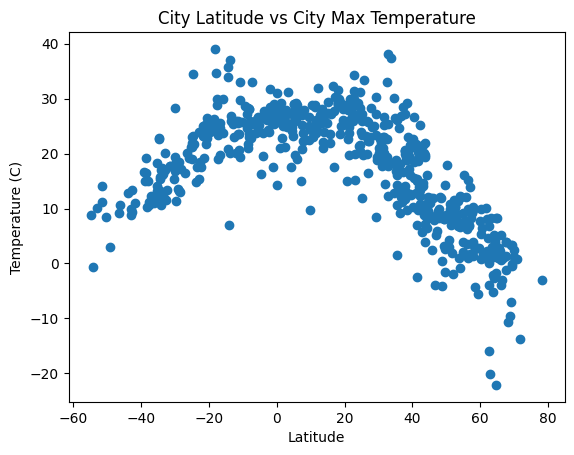

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],)
# Incorporate the other graph properties
plt.title('City Latitude vs City Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

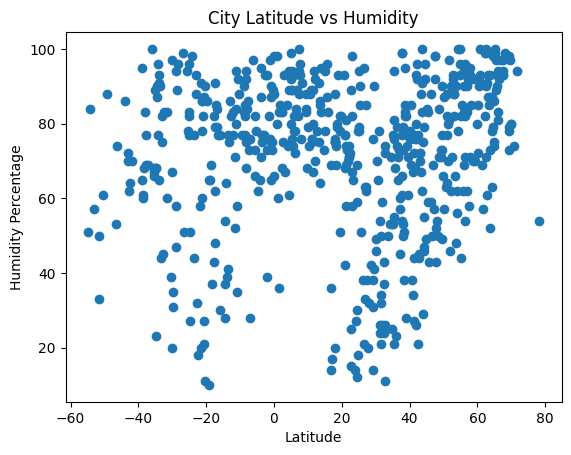

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.title('City Latitude vs Humidity')
plt.ylabel('Humidity Percentage')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

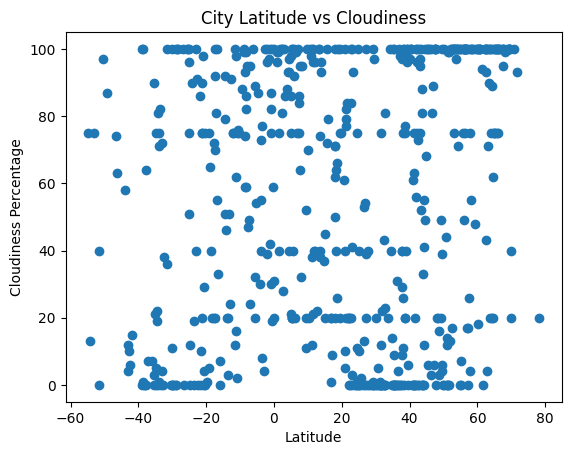

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudiness Percentage')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

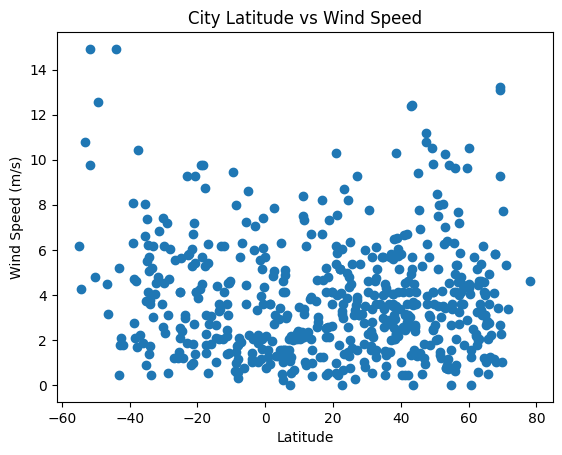

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y,xlabel='set with argument 3',ylabel='set with argument 4',title='set with argument 5',text=None):
    regression_line=linregress(x,y)
    plt.scatter(x,y)
    reg_y=regression_line[0]*x+regression_line[1]
    plt.plot(x,reg_y,color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if text==None:
        x_min=x.min()
        x_max=x.max()
        y_min=y.min()
        y_max=y.max()
        x_text = x_min + 0.1 * (x_max - x_min)
        y_text = y_min + 0.9 * (y_max - y_min)
        text=(x_text, y_text)
    plt.annotate(f'y={round(regression_line[0],2)}x+{round(regression_line[1],2)}',text,fontsize=16,color='r')
    plt.title(title)
    print(f'r={round(regression_line[2],2)}, r^2={round(regression_line[2]**2,2)}')
    plt.show()

In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,remire-montjoly,4.9167,-52.2667,29.02,74,75,1.54,GF,1697492878
1,muhos,64.8080,25.9931,2.88,86,100,4.07,FI,1697492878
3,vilyuchinsk,52.9306,158.4028,8.15,92,100,10.27,RU,1697492878
4,polyarnyy,69.1989,33.4478,3.30,78,100,13.08,RU,1697492879
7,vorgashor,67.5833,63.9500,1.43,97,100,4.08,RU,1697492879


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-0.61,84,13,4.27,GS,1697492878
5,port-aux-francais,-49.3500,70.2167,2.99,88,87,12.57,TF,1697492594
6,waitangi,-43.9535,-176.5597,12.74,86,58,14.90,NZ,1697492879
11,papatowai,-46.5619,169.4708,9.23,53,74,4.50,NZ,1697492590
15,ushuaia,-54.8000,-68.3000,8.81,51,75,6.17,AR,1697492881


###  Temperature vs. Latitude Linear Regression Plot

r=-0.83, r^2=0.69


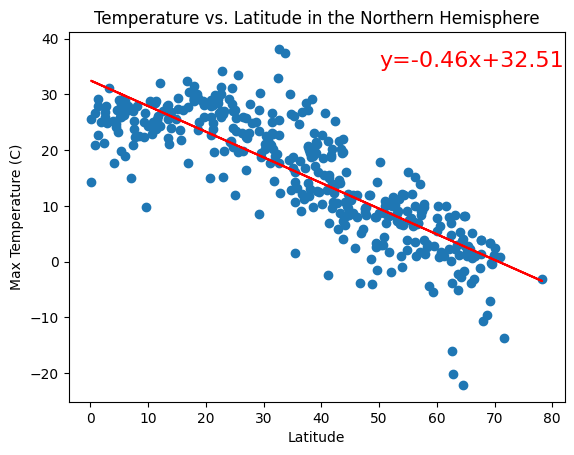

In [95]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temperature (C)','Temperature vs. Latitude in the Northern Hemisphere',(50,35))

r=0.76, r^2=0.58


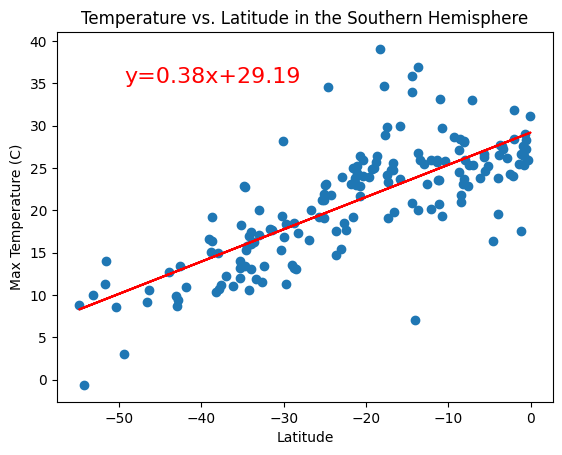

In [96]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temperature (C)','Temperature vs. Latitude in the Southern Hemisphere')

**Discussion about the linear relationship:** We can see in both the Northern and Southern hemispheres there is a strong correlation between Latitude and Temperature with Temperature increasing as we approach the equator. R is greater than .7 in both cases and R^2 is above .5 in both cases meaning a strong correlations and the majority of the variation of temperature is explained by Latitude. A note on a possible confounding varible is that our data points are all cities and cities are not built in random places there may be some affect of moderating the temp for human confort, agriculure, or any other number of human-centric concerns, and this may differ depending on the hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

r=0.11, r^2=0.01


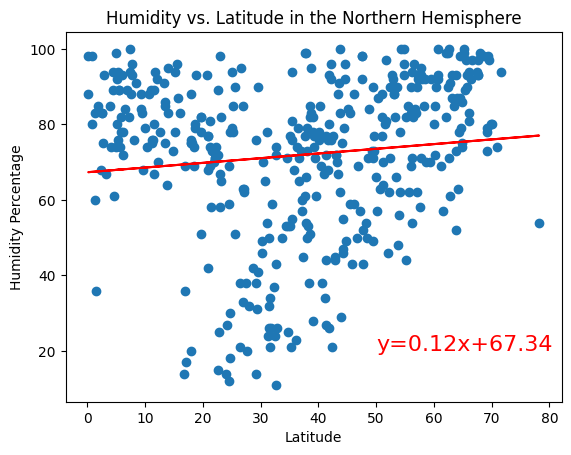

In [97]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity Percentage','Humidity vs. Latitude in the Northern Hemisphere',(50,20))

r=0.13, r^2=0.02


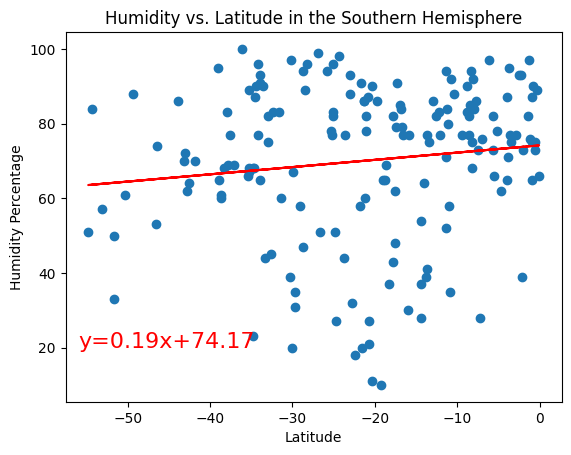

In [98]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity Percentage','Humidity vs. Latitude in the Southern Hemisphere',(-56,20))

**Discussion about the linear relationship:** In both hemispheres we have low r values indicating a weak realtionship between Humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

r=0.13, r^2=0.02


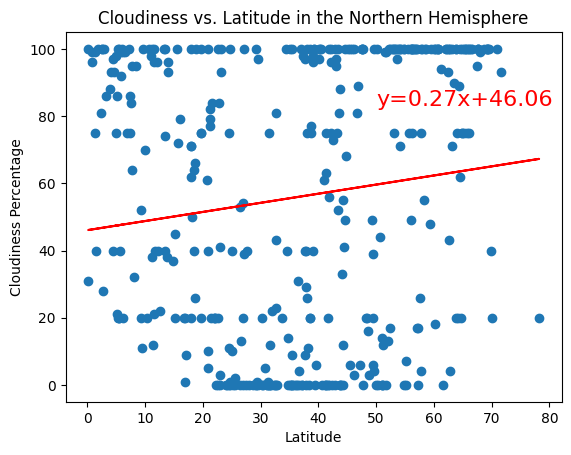

In [99]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness Percentage','Cloudiness vs. Latitude in the Northern Hemisphere',(50,83))

r=0.25, r^2=0.06


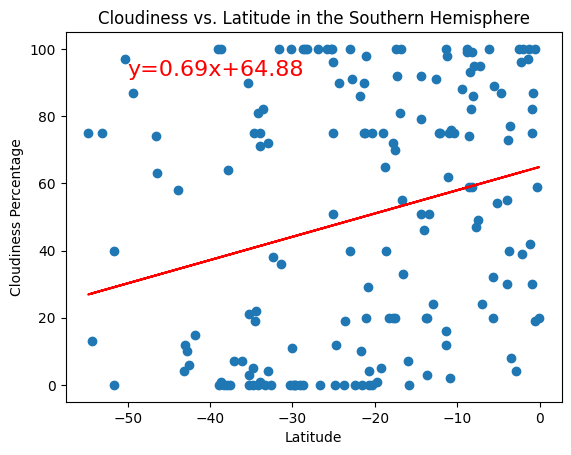

In [100]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness Percentage','Cloudiness vs. Latitude in the Southern Hemisphere',(-50,92))

**Discussion about the linear relationship:** R values are very low, our linear regression show little to no relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

r=0.17, r^2=0.03


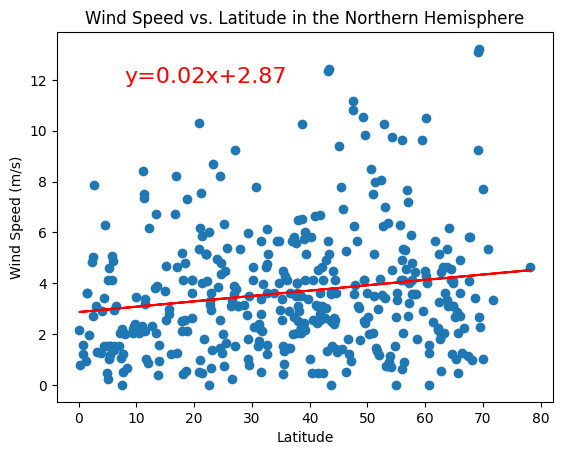

In [101]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)','Wind Speed vs. Latitude in the Northern Hemisphere')

r=-0.29, r^2=0.08


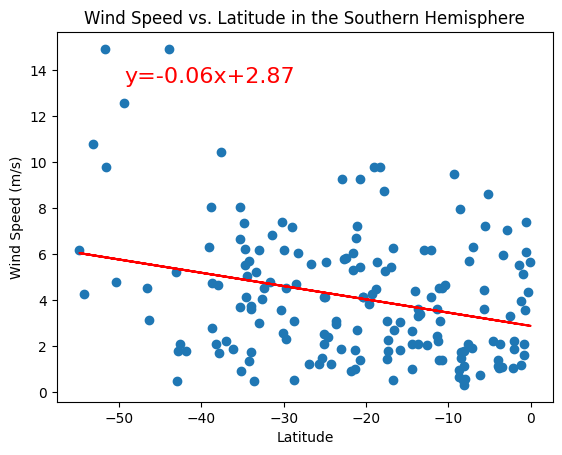

In [102]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)','Wind Speed vs. Latitude in the Southern Hemisphere')

**Discussion about the linear relationship:** Once again we low r values showing a small or non-existance reltionship between wind speed and latitude.